Our first graphic is a correlation heatmap of our cleaned data for white and red wine.  The wine data is NOT combined because in my opinion people have different flavor expectations for red and white wine and thus the the same quality in each wine could have different impacts on perception of quality.

NAs in Red: False 

NAs in White: False 



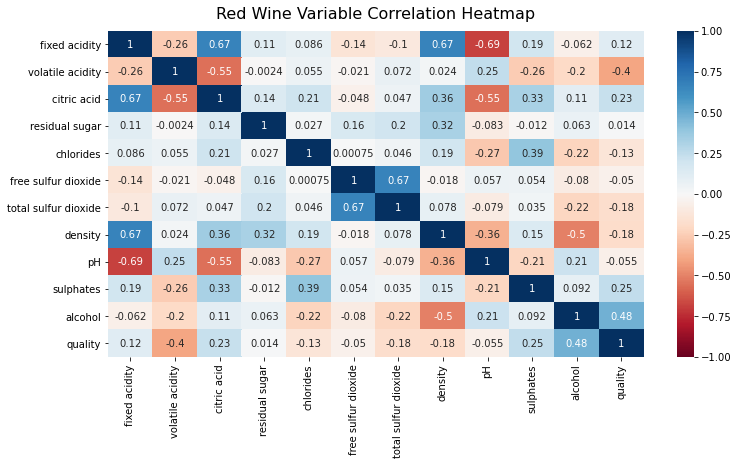

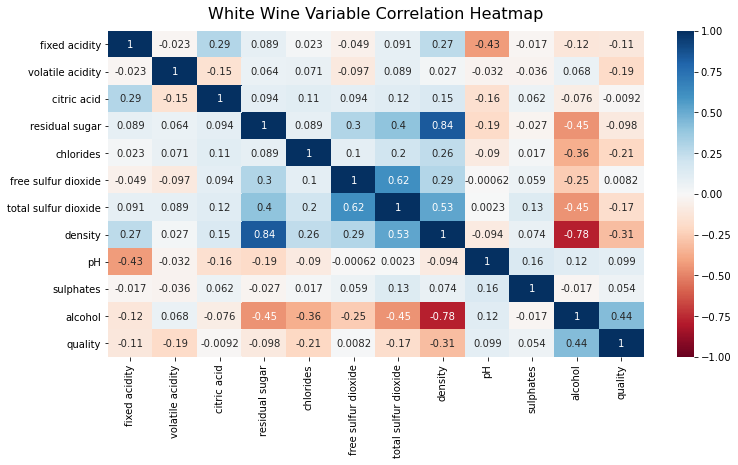

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm

#Accesses and reads data from csv 
redWine = pd.read_csv('/Users/Malison/Documents/Data Science/wine_red_white/wine_red_white/winequality-red.csv', sep = ';')
redWine.head()
whiteWine = pd.read_csv('/Users/Malison/Documents/Data Science/wine_red_white/wine_red_white/winequality-white.csv', sep = ';')
whiteWine.head()

#Cleaning the data
redWine.drop_duplicates(inplace=True)
redWine.drop_duplicates(inplace=True)
#Checks to male sure no leftover non applicable terms in the data sets
print('NAs in Red:', redWine.isna().any().any(),'\n')
print('NAs in White:', whiteWine.isna().any().any(),'\n')

#creates picture w/ designated size (12,6)
plt.figure(figsize=(12,6))
#creates heatmap that correlates the red wine data, sets range from -1 to 1, and sets the color
heatmap = sns.heatmap(redWine.corr(), vmin = -1, vmax=1, annot = True, cmap = 'RdBu')
heatmap.set_title('Red Wine Variable Correlation Heatmap', fontdict={'fontsize':16}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
#creates picture w/ designated size (12,6)
plt.figure(figsize=(12,6))
#creates heatmap that correlates the white wine data, sets range from -1 to 1, and sets the color
heatmap = sns.heatmap(whiteWine.corr(), vmin = -1, vmax=1, annot = True, cmap = 'RdBu')
heatmap.set_title('White Wine Variable Correlation Heatmap', fontdict={'fontsize':16}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


Next we create groups of poor, mediocre, and good for both wine types.  We then can make histograms showing both raw quality scores and grouped. Based off of this visual, an assumption could be made that white wines are more popular or appealing to general tastes by looking at the relation of good to mediocre scores for each type.  I also noticed that we do have significantly more data for white wines than we do for red wines.

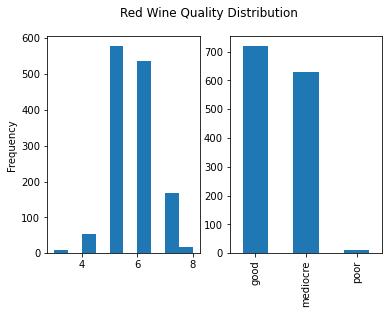

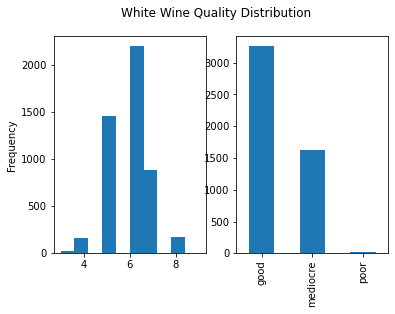

In [23]:
#create subgroups of red wine quality with scores of 0 to 3 being poor, 4 to 6 being mediocre, and 7+ being good
x = []
for element in redWine.quality:
    if ((element >=0) and (element <4)):
        x.append('poor')
    elif ((element >= 4) and (element<6)):
        x.append('mediocre')
    else:
        x.append('good')

redWine['grouped quality'] = x

plt.figure()
#creates histogram of raw red wine quality scores
plt.subplot(121)
redWine.quality.plot(kind='hist')
#creates histogram for grouped red wine quality scores
plt.subplot(122)
adj_aw_hist = redWine['grouped quality'].value_counts()
adj_aw_hist.plot(kind="bar")

plt.suptitle('Red Wine Quality Distribution')

plt.show()

#create subgroups of white wine quality with scores of 0 to 3 being poor, 4 to 6 being mediocre, and 7+ being good
x = []
for element in whiteWine.quality:
    if ((element >=0) and (element <4)):
        x.append('poor')
    elif ((element >= 4) and (element<6)):
        x.append('mediocre')
    else:
        x.append('good')

whiteWine['grouped quality'] = x

plt.figure()
#creates histogram of raw white wine quality scores
plt.subplot(121)
whiteWine.quality.plot(kind='hist')
#creates histogram for grouped white wine quality scores
plt.subplot(122)
adj_aw_hist = whiteWine['grouped quality'].value_counts()
adj_aw_hist.plot(kind="bar")

plt.suptitle('White Wine Quality Distribution')

plt.show()

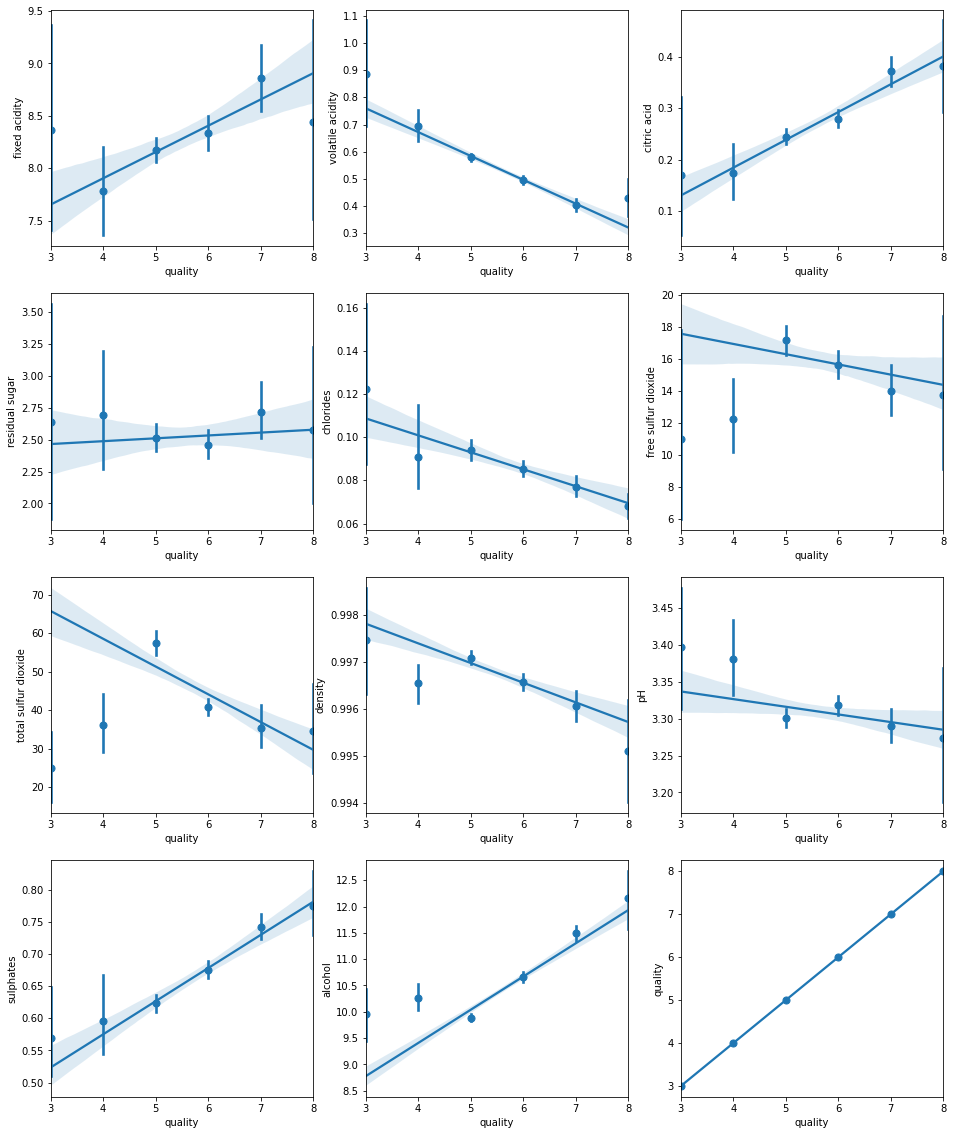

In [34]:
col=["fixed acidity", "volatile acidity", 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(4, 3, figsize=(16,20))
i=0
for x in range(4):
    for y in range(3):
        sns.regplot(x="quality", y=col[i], data=redWine, x_estimator=np.mean,ax=axes[x, y])
        i+=1